## Programming Assignment 1 - greedy algorithm

### 1 - 1) job scheduling in decreasing order of the difference (weight - length)

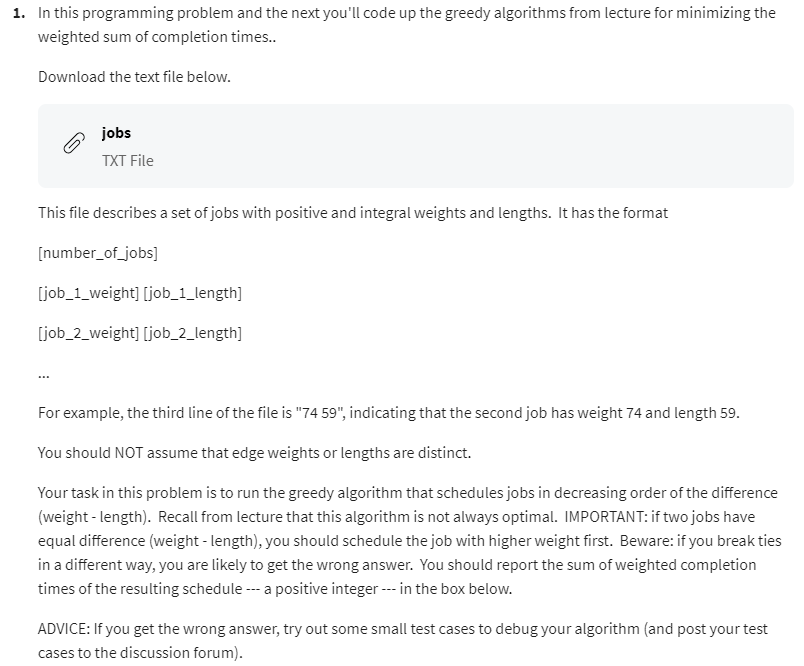

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
with open('/content/gdrive/My Drive/Colab Notebooks/Coursera/Algorithm_Specialization/Chapter3/jobs.txt', 'r') as f:
    tmps = f.readlines()

Mounted at /content/gdrive


In [ ]:
import pandas as pd

data = tmps[1:]
data = list(map(lambda x : x[:-1], data))

job_weights = []
job_lengths = []
diffs = []

for i in range(len(data)):
  tmp = data[i].split(' ')
  job_weights.append(int(tmp[0]))
  job_lengths.append(int(tmp[1]))
  diffs.append(int(tmp[0]) - int(tmp[1]))

df = pd.DataFrame({'weight' : job_weights, 'length' : job_lengths, 'diff' : diffs})
df.sort_values(by=['diff'], ascending = False, inplace = True)

cumulation = list(df['length'].copy())

for i in range(1, len(cumulation)):
  cumulation[i] += cumulation[i - 1]

df['cumulative_length'] = cumulation
df['weighted_score'] = df['weight'].mul(df['cumulative_length'])

sum(df['weighted_score'])

69119547392

### 1 - 2) job scheduling in decreasing order of the ratio (weight/length)

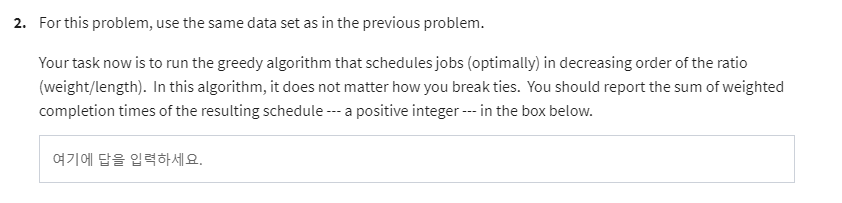

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
with open('/content/gdrive/My Drive/Colab Notebooks/Coursera/Algorithm_Specialization/Chapter3/jobs.txt', 'r') as f:
    tmps = f.readlines()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

data = tmps[1:]
data = list(map(lambda x : x[:-1], data))

job_weights = []
job_lengths = []
ratios = []

for i in range(len(data)):
  tmp = data[i].split(' ')
  job_weights.append(int(tmp[0]))
  job_lengths.append(int(tmp[1]))
  ratios.append((int(tmp[0]) / int(tmp[1])))

df = pd.DataFrame({'weight' : job_weights, 'length' : job_lengths, 'ratio' : ratios})
df.sort_values(by=['ratio'], ascending = False, inplace = True)

cumulation = list(df['length'].copy())

for i in range(1, len(cumulation)):
  cumulation[i] += cumulation[i - 1]

df['cumulative_length'] = cumulation
df['weighted_score'] = df['weight'].mul(df['cumulative_length'])

sum(df['weighted_score'])

67311454237

### 1 - 3) Prim's minimum spanning tree

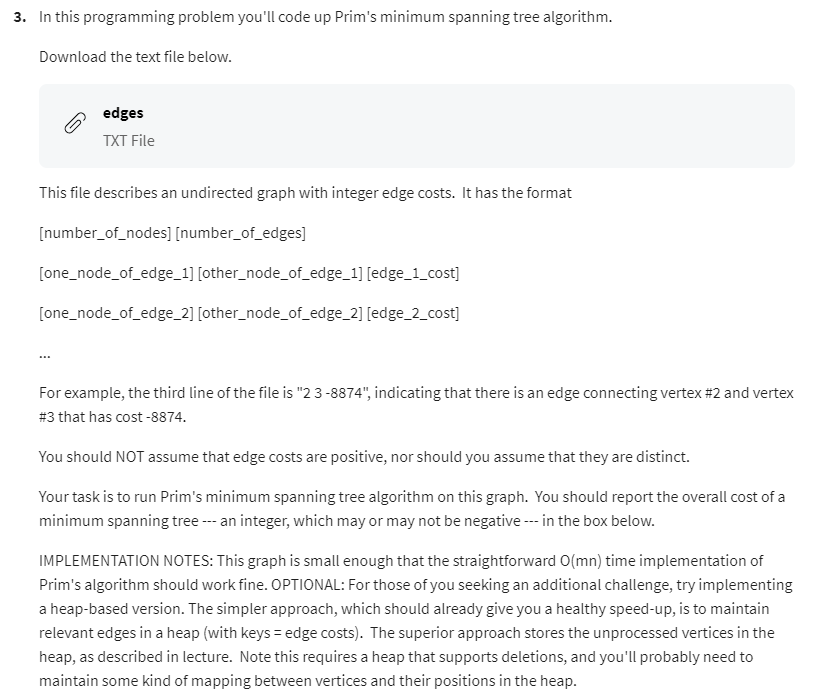

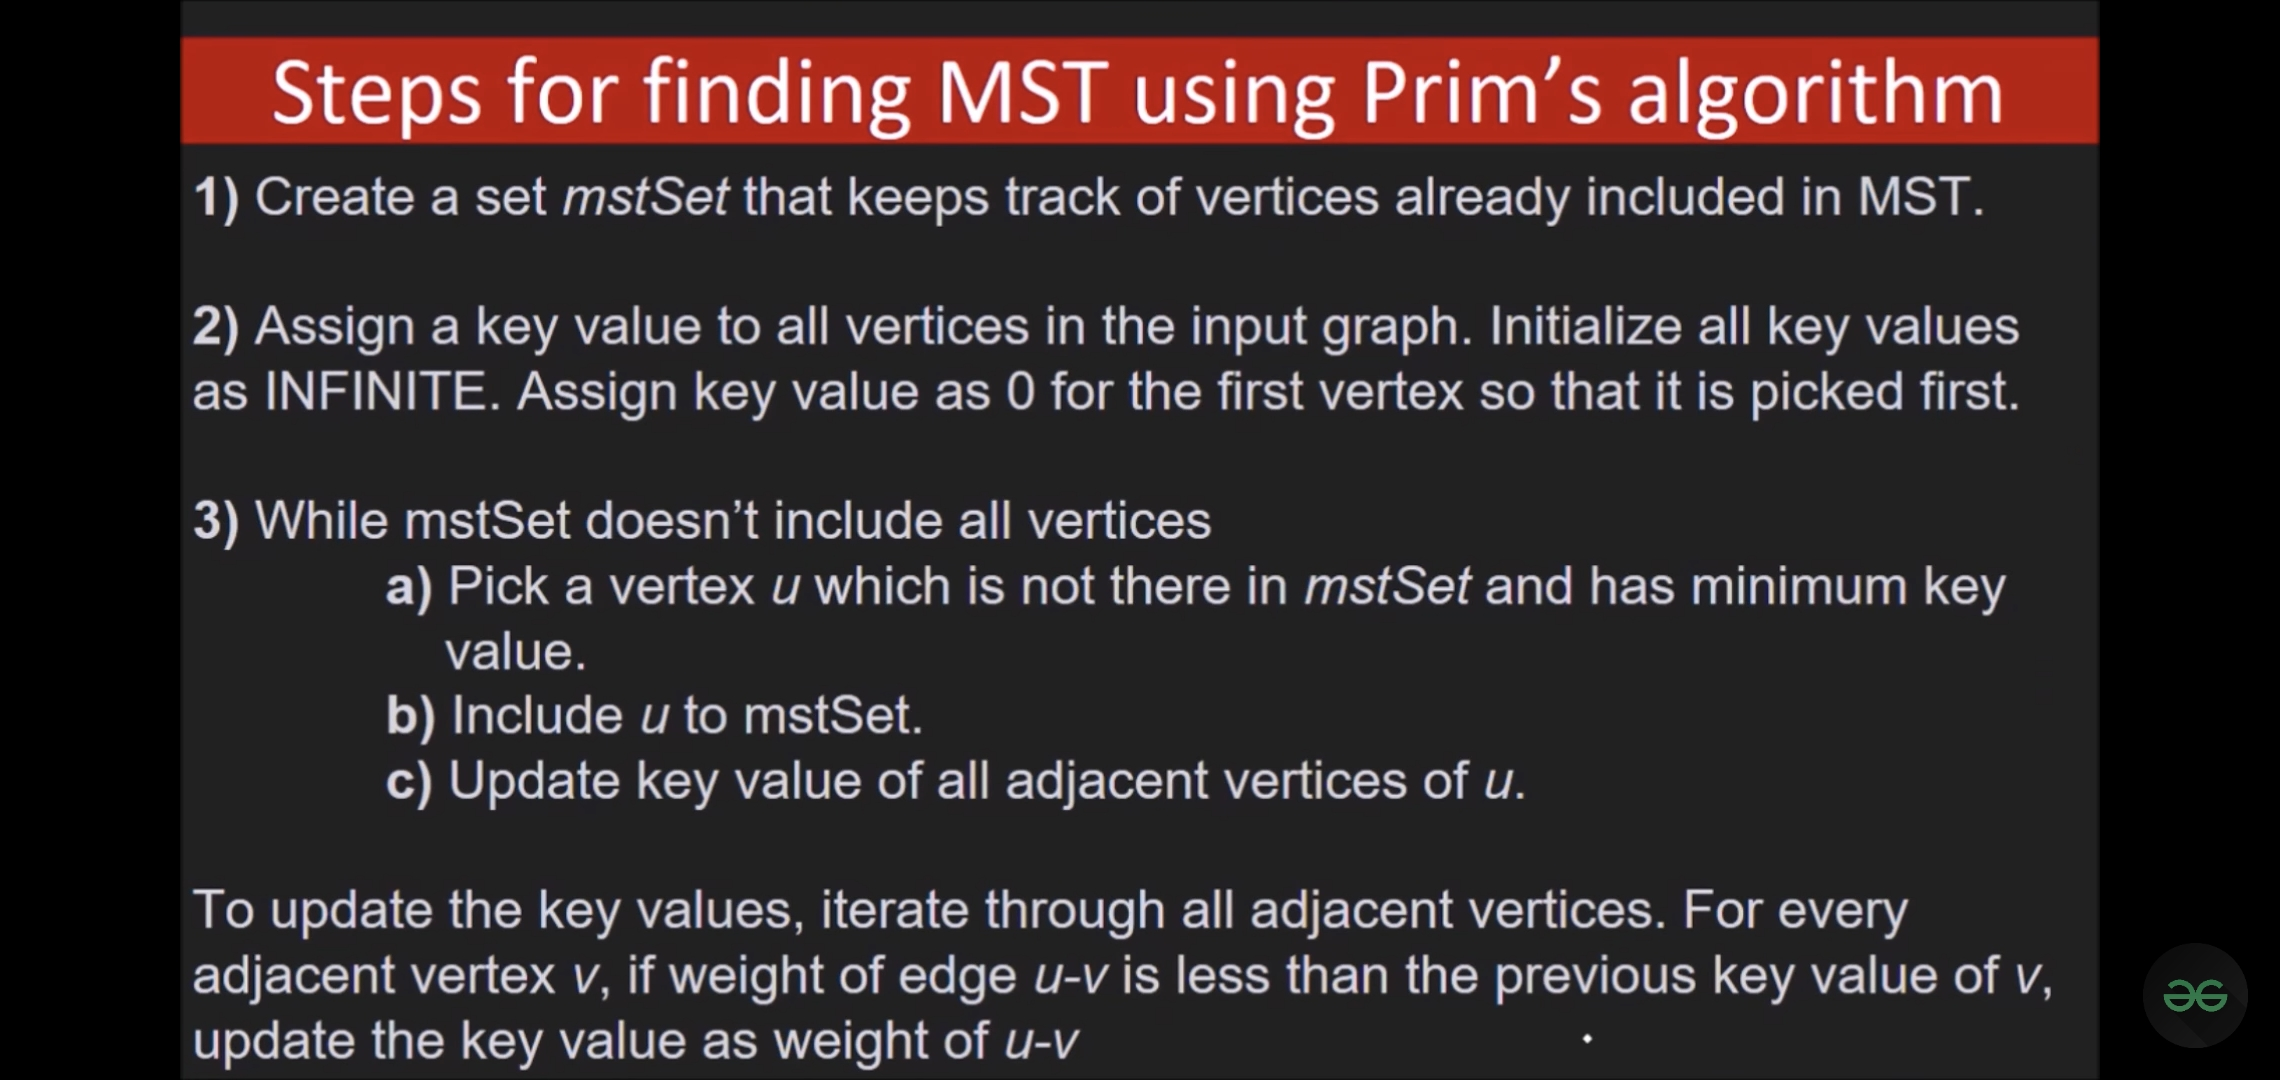

In [ ]:
from google.colab import drive
import heapq

mst = []
usedVertices = set()

drive.mount("/content/gdrive")
with open('/content/gdrive/My Drive/Colab Notebooks/Coursera/Algorithm_Specialization/Chapter3/edges.txt', 'r') as f:
    numVertices = int(f.readline()[:-1].split(' ')[0])
    edges = [[]for _ in range(numVertices + 1) ]

    for datum in f.readlines():
      edge = tuple(map(int, datum[:-1].split(' ')))
      if edge[0] == edge[1]:
        continue

      heapq.heappush(edges[edge[0]], (edge[2], edge[1]) )
      heapq.heappush(edges[edge[1]], (edge[2], edge[0]) )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cost = 0 # edges[vertex][0] means the cost of the edge
dest = 1 # edges[vertex][1] means the destination vertex of the edge (undirected tho)

while len(usedVertices) < numVertices: # while not spanned all vertices yet

  vertexWithSmallestEdge = 1 # start point is random / this value can be any random integer within the range of [1, 500]
                             # the original role is to store the vertex with smallest weight

  for vertex in usedVertices: # used vertices

    while len(edges[vertex]) > 0 and edges[vertex][0][dest] in usedVertices: # not to reuse / revisit previously spanned edges / vertices, pop all of them out of the heap
      heapq.heappop(edges[vertex])

    if len(edges[vertex]) == 0: continue # if already popped all, go to next loop

    if len(edges[vertexWithSmallestEdge]) == 0 or edges[vertex][0][cost] < edges[vertexWithSmallestEdge][0][cost]: ### IMPORTANT ###
      vertexWithSmallestEdge = vertex

  edge = heapq.heappop(edges[vertexWithSmallestEdge]) # pop the minimum cost edge

  mst.append((vertexWithSmallestEdge, edge[dest], edge[cost])) # append it to mst (containing three information; 1. source vertex of the edge; 2. destination vertex of the edge; 3. cost(= weight) of the edge)
  usedVertices.add(vertexWithSmallestEdge) # source vertex is now regarded as used one and never to revisit
  usedVertices.add(edge[dest]) # destination vertex is now regarded as used one and never to revisit

In [ ]:
sum([tup[2] for tup in mst])

-3612829

In [ ]:
mst[0]

(1, 397, -5942)